# Principal Component Analysis (PCA) Tutorial
### Author: _Calvin Chi_

# Why PCA works
The purpose of principal component analysis (PCA) is to perform dimensionality reduction by projecting data points onto new dimensions that capture maximum variance. PCA could be used as a visualization technique for understanding the hidden and simplified structure that underlie data. The new dimensions (axes) that PCA projects data points to are orthogonal eigenvectors. How do you project data points to another dimension (axis)? Before we answer that, let us review a linear algebra concept. Let $A$ be a matrix where each column is treated as a vector and let $X$ be a matrix of data points. 
$$A = \begin{bmatrix}
1&1\\
1&-1\\
\end{bmatrix}\\
X = \begin{bmatrix}
1&1\\
2&2\\
3&3\\
4&4\\
2&3\\
3&2\\
\end{bmatrix}$$

Plotting the vectors and data points: 

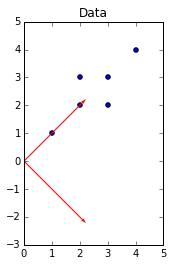

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [2, 3], [3, 2]])
A = np.array([[1, 1], [1, -1]])
fig, ax = plt.subplots()
plt.scatter(x[:, 0], x[:, 1])
plt.ylim([-3, 5])
plt.xlim([0, 5])
plt.title("Data")
plt.gca().set_aspect('equal', adjustable='box')
ax.quiver((0, 0), (0, 0), (1, 1), (1, -1), scale_units = 'xy', scale = (0.45), color = 'r')
plt.show()

The operation $XA$ rotates the data points in $X$ such that they are plotted against the vectors in $A$ as the axes. In other words, $A$ is a rotation matrix. Let us illustrate that: 

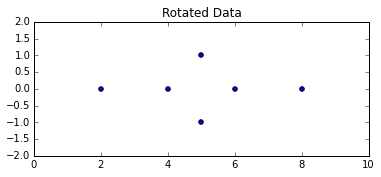

In [10]:
rotated = x.dot(A)
plt.scatter(rotated[:, 0], rotated[:, 1])
plt.ylim([-2, 2])
plt.xlim([0, 10])
plt.title("Rotated Data")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

PCA performs operations similar to the one just illustrated. To iterate, PCA plots data points against axes that capture maximum variance. We will later see that these axes are just eigenvectors, and they can be found either through singular value decomposition (SVD) of the column-centered data matrix or through finding the eigenvectors of the covariance matrix. Assume $X \in \mathbb{R}^{nxd}$ is our data matrix and we have already found these eigenvectors contained as columns in the matrix called $U \in \mathbb{R}^{dxk}$. Let us assume $n$ = number of data points and $d$ = features. To plot the data against one eigenvector, we would pick a column $e$ from $U$ and perform the following operation: 
$\hat{X} = e^TX^T$, where $e^T \in \mathbb{R}^{1xd}$ and $\hat{X} \in \mathbb{R}^{1xn}$. We can see that after this matrix multiplication, each data point is now represented by one feature instead of $k$ features, thus achieving dimensionality reduction. Now we show the proof that eigenvectors are the dimenions that maximize variance. 

$X \in \mathbb{R}^{nxd}$ = items by features data matrix (centered)

$e$ = dimension(vector) that data points are projected to
$$\frac{1}{n}\sum_{i=1}^{n}\Big(\sum_{j=1}^{d}x_{ij}e_j - \mu\Big)^2 = \frac{1}{n}\sum_{i=1}^{n}\Big(\sum_{j=1}^{d}x_{ij}e_j\Big)^2\\
V = \frac{1}{n}\sum_{i=1}^{n}\Big(\sum_{j=1}^{d}x_{ij}e_j\Big)^2 - \lambda\bigg(\Big(\sum_{k=1}^{d}e_j^2\Big)-1\bigg)\\
\frac{\partial V}{\partial e_{a}} = \frac{2}{n}\sum_{i=1}^{n}\Big(\sum_{j=1}^{d}x_{ij}e_j\Big)x_{ia} - 2\lambda e_a = 0\\
2\sum_{i=1}^{d}e_j\Big(\frac{1}{n}\sum_{i=1}^{n}x_{ia}x_{ij}\Big) = 2\lambda e_a\\
\begin{Bmatrix}
\sum_{j=1}^{d}cov(1, \textit{j})e_j = \lambda e_1\\
\vdots\\
\sum_{j=1}^{d}cov(d, \textit{j})e_j = \lambda e_d\\
\end{Bmatrix}\\
\Sigma e = \lambda e$$

The first equation comes from the definition of variance of points plotted against a vector. Since the data is assumed to be centered by column(features), the mean of the projected points $\mu$ is equal to zero. The second equation applies the method of Lagrange multiplers (constraint: $\|e\|_{2} = 1$) to solve for $e$ that would maximize variance. We can observe from the end result that $e$ must be an eigenvector and $\lambda$ must be an eigenvalue from definition of eigenvector and eigenvalue. The last equation rewrites the result in matrix notation, where $\Sigma$ is the feature covariance matrix. Let us verify the result in the last line through an example calculation: 

Toy data:
[[ 0.5         0.51706651]
 [ 1.          1.07165469]
 [ 2.          1.73323622]
 [ 3.          2.87334892]
 [ 4.          4.19179732]]


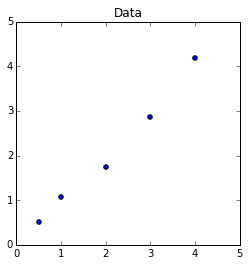

In [6]:
import random
random.seed(1)
noise = np.random.normal(0, 0.2, 5)
x = np.array([[0.5, 0.5 + noise[0]], [1, 1 + noise[1]], [2, 2 + noise[2]], [3, 3 + noise[3]], [4, 4 + noise[4]]])
print "Toy data:"
print x
plt.scatter(x[:, 0], x[:, 1])
plt.ylim([0, 5])
plt.xlim([0, 5])
plt.title("Data")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [7]:
x_centered = x - x.mean(axis=0)
XTX = x_centered.T.dot(x_centered)
feature_cov = XTX/5
print "Feature covariance matrix: "
print feature_cov

Feature covariance matrix: 
[[ 1.64        1.67419575]
 [ 1.67419575  1.73376473]]


In [11]:
U, S, V = np.linalg.svd(feature_cov)
#U = eigenvectors to project points to produce reduced item feature vector
#S = eigenvalues associated with eigenvectors
left = feature_cov.dot(U[:, 0])
right = S[0]*U[:, 0]

$\Sigma e$ is:  

In [12]:
left 

array([-2.34359916, -2.41014547])

$\lambda e$ is:  

In [10]:
right

array([-2.34359916, -2.41014547])

Which verifies the equivalence of the result in the last line. So far we have talked about the role of eigenvectors in PCA, but not the eigenvalues. Let us talk about the meaning of eigenvalues $\lambda$. In PCA, the eigenvalue $\lambda$ of an eigenvector is the variance of the projected points against that eigenvector. Let us proof this statement by starting with the variance of projected points: 
$$\sigma^2 = \frac{1}{n}\sum_{i=1}^{n}\Big(\sum_{j=1}^{d}x_{ij}e_{j} - \mu \Big)^2 = \frac{1}{n}\sum_{i=1}^{n}\Big(\sum_{j=1}^{d}x_{ij}e_{j}\Big)^2$$
$$=\frac{1}{n}\sum_{i=1}^{n}\Big(\sum_{j=1}^{d}x_{ij}e_{j}\Big)(\sum_{a=1}^{d}x_{ia}e_{a}\Big)$$
$$=\sum_{a=1}^{d}\sum_{j=1}^{d}\Big(\frac{1}{n}\sum_{i=1}^{n}x_{ia}x_{ij}\Big)e_{j}e_{a}$$
$$=\sum_{a=1}^{d}\Big(\sum_{j=1}^{d}cov(a, j)e_{j}\Big)e_{a}$$
$$=\sum_{a=1}^{d}\Big(\lambda e_{a}\Big)e_{a}$$
$$=\lambda \|e\|^2 = \lambda$$
Let us verify this via an example calculation: 

In [13]:
reduced_item = U[:, 0].T.dot(x_centered.T)
variance = reduced_item.dot(reduced_item.T)/5
print "Variance of reduced item vector: "
print variance
print "Eigenvalue of eigenvector projected to: "
print S[0]

Variance of reduced item vector: 
3.36173440585
Eigenvalue of eigenvector projected to: 
3.36173440585


In PCA terminology, the first principle component refers to the dimension capturing the maximum variance, the second principle component refers to the dimension capturing the second most variance, and so on. In PCA, one would project the data onto dimensions that capture maximum variance to capture the most important structure of the data. 

---
# How to perform PCA
Let us now talk about how to perform PCA, and there are many ways one can perform PCA. The first step in PCA is to compute the eigenvectors and eigenvalues of your data matrix $X$. There are two methods of computing the eigenvectors and eigenvalues. In the first method, one could directly perform singular value decomposition (SVD) on the data matrix $X$.

$$X = USV^T$$

$$U \in \mathbb{R}^{nxk}$$
$$S \in \mathbb{R}^{kxk}$$
$$V^T \in \mathbb{R}^{kxd}$$

$U$ and $V$ are orthonormal matrices containing eigenvectors, and $S$ is a diagonal matrix containing eigenvalues, which are ordered in decreasing value as you transverse down the diagonal from top left to bottom right. Each column in $U$ is an eigenvector, and it is associated with an eigenvalue in $S$. Specifically, the eigenvector $U_1$ would correspond to the eigenvalue $S_{11}$. In contrast, each row in $V^T$ is an eigenvector, and it too is associated with an eigenvalue. For example, the eigenvector $V_1$ would correspond to the eigenvalue $S_{11}$. 

In the second method, one would compute a rough covariance matrices of the data matrix $X$ first, then perform SVD on each covariance matrix to solve for $U$ and $V$. I used the term "rough" to describe the covariance matrices because in the equations below, I do not divide the $XX^T$ by _d_ or $X^TX$ by _n_, simply because this ensures that $S_1 = S_2 = S^2$. However, if I were to calculate the proper covariance matrices, the eigenvectors I get from their SVD would still be the same. Concretely: 

$$Cov1 = XX^T\\
Cov2 = X^{T}X\\
U_1S_1V_{1}^T = Cov1\\
U_2S_2V_{2}^T = Cov2\\$$

We can show that $U_1 = U$ and $U_2 = V$: 

$$XX^T = USV^TVSU^T = US^2U^T\\ 
X^TX = VSU^TUSV^T = VS^2V^T\\$$

Which means that: 
$$S_1 = S_2\\
S = S_1S^{-1}\\$$


Let us run some actual code to demonstrate their equivalence: 

In [15]:
#Method 1
U, S, V = np.linalg.svd(x_centered, full_matrices=0)
S = np.diag(S)
Sinv = np.linalg.inv(S)

#Method 2
XXT = np.dot(x_centered, x_centered.T)
U1, S1, V1 = np.linalg.svd(XXT)
XTX = np.dot(x_centered.T, x_centered)
U2, S2, V2 = np.linalg.svd(XTX)
S2 = np.diag(S2)
print "Method 1 U"
print U
print "Method 2 U"
print U1[:, :2]
print "Method 1 V"
print V
print "Method 2 V"
print U2
print "Method 1 S"
print S
print "Method 2 S"
print S2.dot(Sinv)

Method 1 U
[[-0.54492313 -0.24183089]
 [-0.36292236 -0.3566404 ]
 [-0.07719133  0.68601659]
 [ 0.29222002  0.36846187]
 [ 0.69281679 -0.45600717]]
Method 2 U
[[-0.54492313 -0.24183089]
 [-0.36292236 -0.3566404 ]
 [-0.07719133  0.68601659]
 [ 0.29222002  0.36846187]
 [ 0.69281679 -0.45600717]]
Method 1 V
[[ 0.69713989  0.71693512]
 [ 0.71693512 -0.69713989]]
Method 2 V
[[-0.69713989 -0.71693512]
 [-0.71693512  0.69713989]]
Method 1 S
[[ 4.09983805  0.        ]
 [ 0.          0.24525827]]
Method 2 S
[[ 4.09983805  0.        ]
 [ 0.          0.24525827]]


Once we have our eigenvectors and eigenvalues, the next step will be to project our data onto the eigenvectors. There are two different ways of projecting the data to $\textit{k}$ principle components to arrive at the following result: 
$$features = \mathbb{R}^{kxd}\\
items = \mathbb{R}^{kxn}$$
1. Multiplying the appropriate eigenvector-containing matrices by the data: 
$$features = \hat{U}^TX\\
items = \hat{V}^TX^T\\$$
2. Multiplying $S$ by $\hat{V}^T$ or $S$ by $\hat{U}^T$:
$$U^TX = U^TUSV^T = SV^T\\
features = S\hat{V}^T\\
V^TX^T = V^TVSU^T = SU^T\\
items = S\hat{U}^T\\$$

The hat symbol above a matrices indicates matrices with the top $k$ eigenvectors chosen, thus $\hat{U} \subseteq U$. 

In [16]:
#Choose only one eigenvector (represent data in one dimension)

Ureduced = np.reshape(U[:, 0], (5, 1))
Vreduced = np.reshape(V.T[:, 0].T, (1, 2))
Sreduced = np.array(S[0, 0])

#Method 1
features1 = (Ureduced.T).dot(x_centered)
items1 = Vreduced.dot(x_centered.T)

#Method 2
features2 = Sreduced.dot(Vreduced)
items2 = Sreduced.dot(Ureduced.T)

print "Method 1 feature vector: "
print features1
print "Method 2 feature vector: "
print features2
print "Method 1 item vector: "
print items1
print "Method 2 item vector: "
print items2

Method 1 feature vector: 
[[ 2.85816065  2.9393179 ]]
Method 2 feature vector: 
[[ 2.85816065  2.9393179 ]]
Method 1 item vector: 
[[-2.23409657 -1.48792288 -0.31647196  1.19805478  2.84043664]]
Method 2 item vector: 
[[-2.23409657 -1.48792288 -0.31647196  1.19805478  2.84043664]]


Now that we have our reduced feature and item vectors, we can reconstruct our original data matrix $M$.

$$M = items^TS^{-1}features = USS^{-1}SV^T$$

Let us see how closely the reconstructed matrix resembles the original data matrix: 

Reconstructed matrix: 
[[ 0.54252216  0.47571843]
 [ 1.0627096   1.01067656]
 [ 1.87937477  1.85053087]
 [ 2.93521178  2.93634828]
 [ 4.08018169  4.11382953]]
Orignal matrix: 
[[ 0.5         0.51706651]
 [ 1.          1.07165469]
 [ 2.          1.73323622]
 [ 3.          2.87334892]
 [ 4.          4.19179732]]


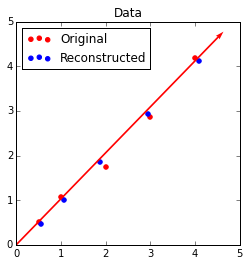

In [17]:
M = items1.T.dot(1/(Sreduced)).dot(features1) + x.mean(axis=0)
print "Reconstructed matrix: "
print M
print "Orignal matrix: "
print x
fig, ax = plt.subplots()
p1 = plt.scatter(x[:, 0], x[:, 1], color='red')
p2 = plt.scatter(M[:, 0], M[:, 1], color='blue')
plt.ylim([0, 5])
plt.xlim([0, 5])
plt.legend([p1, p2], ["Original", "Reconstructed"], loc='upper left')
plt.title("Data")
plt.gca().set_aspect('equal', adjustable='box')
ax.quiver((0), (0), (Vreduced[:, 0][0]), (Vreduced[:, 1][0]), scale_units = 'xy', scale = (0.15), color = 'r')
plt.show()

Alternatively, the data reconstruction could be performed much more straightfowardly by taking advantage of SVD: 

$$\hat{U}\hat{S}\hat{V}^T$$

Where _m_ eigenvectors and eigenvalues are chosen from $U$, $S$, and $V^T$. Let us see that this gives us the same result as above: 

In [18]:
M2 = Ureduced.dot(Sreduced).dot(Vreduced) + x.mean(axis=0)
print "Directly using SVD: "
print M2
print "Using reduced feature and item vectors: "
print M

Directly using SVD: 
[[ 0.54252216  0.47571843]
 [ 1.0627096   1.01067656]
 [ 1.87937477  1.85053087]
 [ 2.93521178  2.93634828]
 [ 4.08018169  4.11382953]]
Using reduced feature and item vectors: 
[[ 0.54252216  0.47571843]
 [ 1.0627096   1.01067656]
 [ 1.87937477  1.85053087]
 [ 2.93521178  2.93634828]
 [ 4.08018169  4.11382953]]


Finally note that principal components are orthogonal to each other since the data are projected onto orthogonal eigenvectors.

# Implementation vs Python's PCA package
Let us try PCA on three-dimensional data using the methods introduced above as well as practice using the PCA package from python. First, let us generate some three-dimensional data and visualize it! In this data sample, we will have 20 points belonging to one class and 20 points from the other. The points will be drawn from two multivariate normal distributions, one with mean (0, 0, 0) and the other with mean (1, 1, 1). The variances are 1 in each dimension and all covariances are 0.  

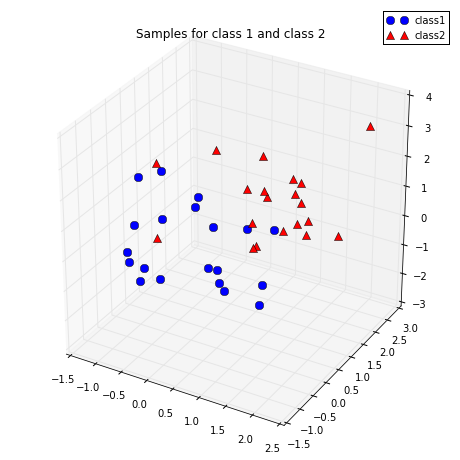

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import pandas as pd

np.random.seed(1)

#Class 1
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T

#Class 2
mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d') #1x1 grid, 1st subplot. 3D plot
plt.rcParams['legend.fontsize'] = 10
#alpha = measure of transparency
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:],
        'o', markersize=8, color='blue', alpha=1, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:],
        '^', markersize=8, alpha=1, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

PCA is an unsupervised learning algorithm, therefore we can disgard information concerning labels and merge the two numpy arrays. Once we have the data matrix, we need to center each feature before performing SVD to find the eigenvectors and eigenvalues. In SVD, the eigenvectors in $V$ corresponds to feature dimensions while the eigenvectors in $U$ corresonds to sample dimensions. 

In [20]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1).T
df = pd.DataFrame({1:all_samples[:,0], 2:all_samples[:,1], 3:all_samples[:,2]})
df_means = df.mean(axis=0)

#Centering the data: 
df_centered = df - df_means

#Getting eigenvectors and eigenvalues
U, S, V = np.linalg.svd(df_centered, full_matrices=0)
S = np.diag(S)
print "Dimensions of U:"
print U.shape
print "Dimensions of V:"
print V.shape

Dimensions of U:
(40, 3)
Dimensions of V:
(3, 3)


Let us reduce all our item vectors from 3 dimensions to 2 dimensions by projecting the data onto feature eigenvectors corresponding to the top 2 eigenvalues, and then plotting the transformed samples in 2-dimensions.

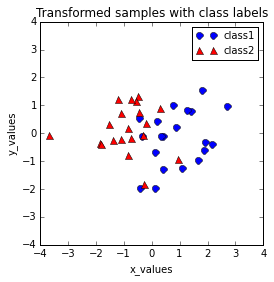

In [34]:
samples_reduced = V[0:2, :].dot(df_centered.T).T
plt.plot(samples_reduced[0:20,0], samples_reduced[0:20, 1],
         'o', markersize=7, color='blue', alpha=1, label='class1')
plt.plot(samples_reduced[20:40, 0], samples_reduced[20:40, 1],
         '^', markersize=7, color='red', alpha=1, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.title('Transformed samples with class labels')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Observe that with 2 dimensions, one is still able to capture the spatial separation between the two classes. Let us use the *PCA* package from sklearn to verify that our results!

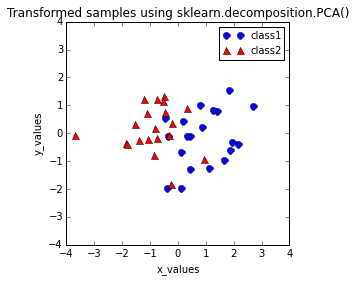

In [35]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)  #Number of eigenvectors to project to
sklearn_transf = sklearn_pca.fit_transform(df_centered)

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1],
         'o', markersize=7, color='blue', alpha=1, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1],
         '^', markersize=7, color='red', alpha=1, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples using sklearn.decomposition.PCA()')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

We can observe that the two results are the same! This concludes the PCA tutorial! 